# Object Detection Using YOLO

## Dependencies

In [65]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.optim import Adam

from torchvision.datasets import VOCDetection
from torchvision.transforms import v2, ToTensor

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

## Device Agnostic Code

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Dataset and Dataloaders

### Data Transformation

**Target Format**

```json
{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}
```

In [48]:
labels = {
    "person": 0,
    "bird": 1,
    "cat": 2,
    "cow": 3,
    "dog": 4,
    "horse": 5,
    "sheep": 6,
    "aeroplane": 7,
    "bicycle": 8,
    "boat": 9,
    "bus": 10,
    "car": 11,
    "motorbike": 12,
    "train": 13,
    "bottle": 14,
    "chair": 15,
    "diningtable": 16,
    "pottedplant": 17,
    "sofa": 18,
    "tvmonitor": 19
}


def target_transform(target: dict):
    data = target['annotation']
    image_width, image_height = int(data['size']['width']), int(data['size']['height'])
    
    objects_list = []
    for obj in data['object']:
        bndbox = {key: int(val) for key,val in obj['bndbox'].items()}
        center_x = (bndbox['xmin'] + bndbox['xmax']) / (2*image_width)
        center_y = (bndbox['ymin'] + bndbox['ymax']) / (2*image_height)
        width = (bndbox['xmax']-bndbox['xmin'])/image_width
        height = (bndbox['ymax']-bndbox['ymin'])/image_height

        objects_list.append([labels[obj['name']], center_x, center_y, width, height])

    return np.array(objects_list)

### Dataset

In [49]:
train_dataset = VOCDetection(root='./data', image_set='train', target_transform=target_transform)
val_dataset = VOCDetection(root='./data', image_set='val', target_transform=target_transform)

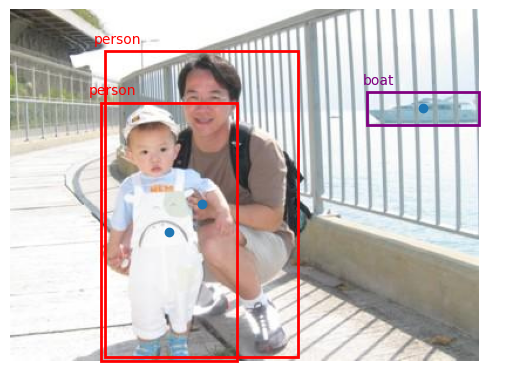

In [98]:
colors = [
    'red', 'blue', 'green', 'cyan', 'magenta',
    'yellow', 'black', 'white', 'orange', 'purple',
    'brown', 'pink', 'teal', 'lavender', 'maroon',
    'navy', 'olive', 'coral', 'indigo', 'turquoise'
]

img = train_dataset[1252][0]
target = train_dataset[1252][1]
coords = target[:, 1:3].T
dimensions = target[:, 3:]

bbox_coords = (coords.T - dimensions/2) * np.array([img.size[0],img.size[1]])

plt.imshow(img)
plt.scatter(coords[0]*img.size[0], coords[1]*img.size[1])

# Add rectangle
for idx, points in enumerate(bbox_coords):
    rect = Rectangle((points[0], points[1]), dimensions[idx][0]*img.size[0], dimensions[idx][1]*img.size[1], 
                     linewidth=2, edgecolor=colors[int(target[idx][0])], facecolor='none')
    plt.gca().add_patch(rect)
    
    # Add title to the rectangle
    plt.text(points[0]+10, points[1]-10, list(labels.keys())[int(target[idx][0])],
             horizontalalignment='center', verticalalignment='center',
             fontsize=10, color=colors[int(target[idx][0])])

plt.axis(False)
plt.show()

### DataLoaders

## Train and Test Functions

## Model

## Training

### Loss Curves